In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../data/heart.csv')

### Basic Informations About Dataset

- Checking missing values, data types etc.
- Checking what values look like.
- Checking statistical values of dataset.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [4]:
df.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


In [5]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


### Distribution of Numerical Features

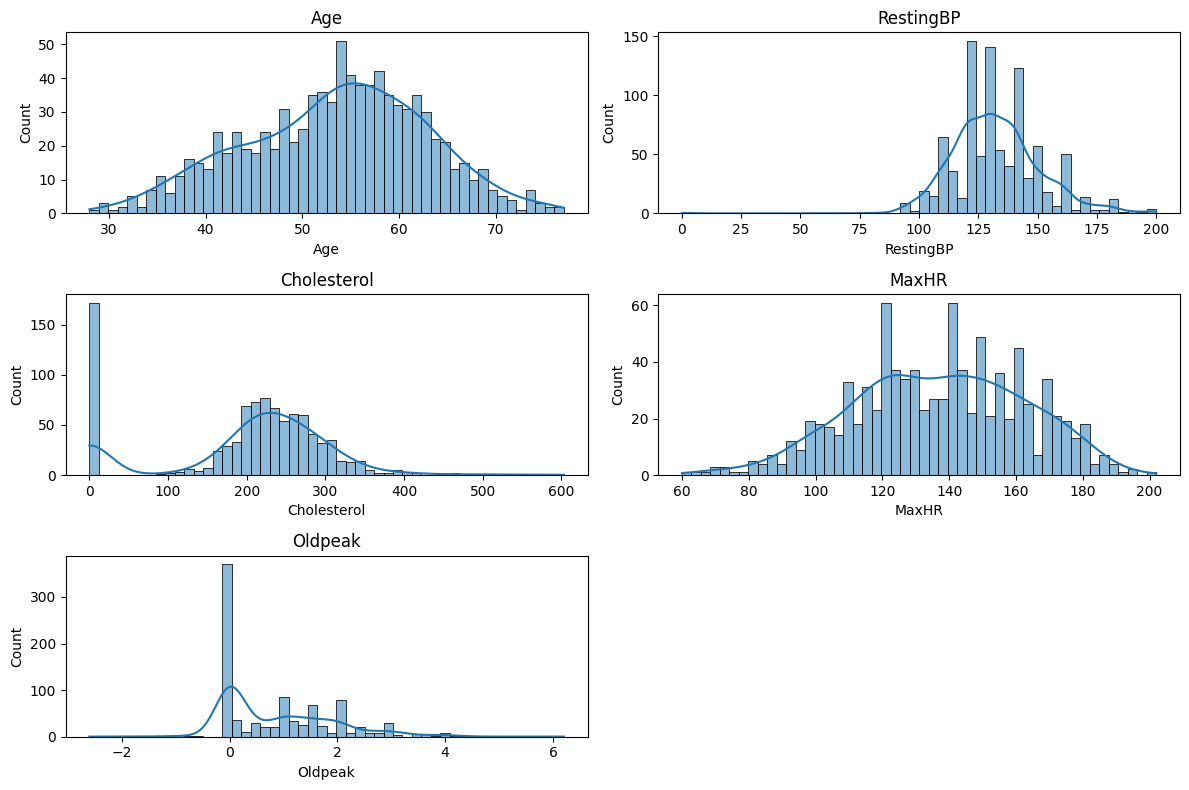

In [7]:
numerical_features = ['Age','RestingBP','Cholesterol','MaxHR','Oldpeak']

plt.figure(figsize=(12, 8))
for feature in numerical_features:
    plt.subplot(3,2,numerical_features.index(feature) + 1)
    sns.histplot(data=df[feature], bins=50, kde=True)
    plt.title(feature)
plt.tight_layout()
plt.show()

### Data Imbalance Check

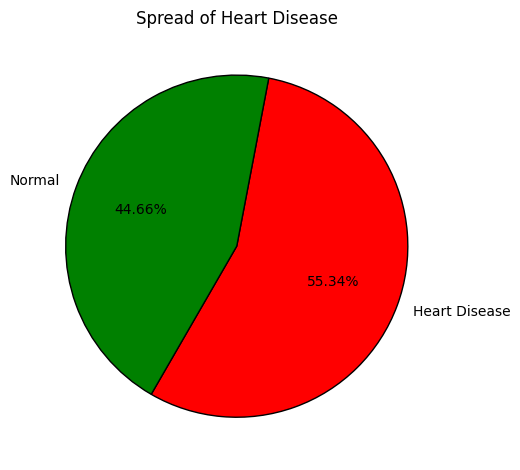

In [8]:
target_values = df['HeartDisease'].value_counts()

plt.pie(target_values, labels=['Heart Disease', 'Normal'],autopct='%.2f%%',
       startangle=240, colors=['red','green'], wedgeprops={'edgecolor':'k','linewidth':1,'antialiased' : True})
plt.title('Spread of Heart Disease')
plt.tight_layout()
plt.show()

### Visualizing Categorical Features Value Counts

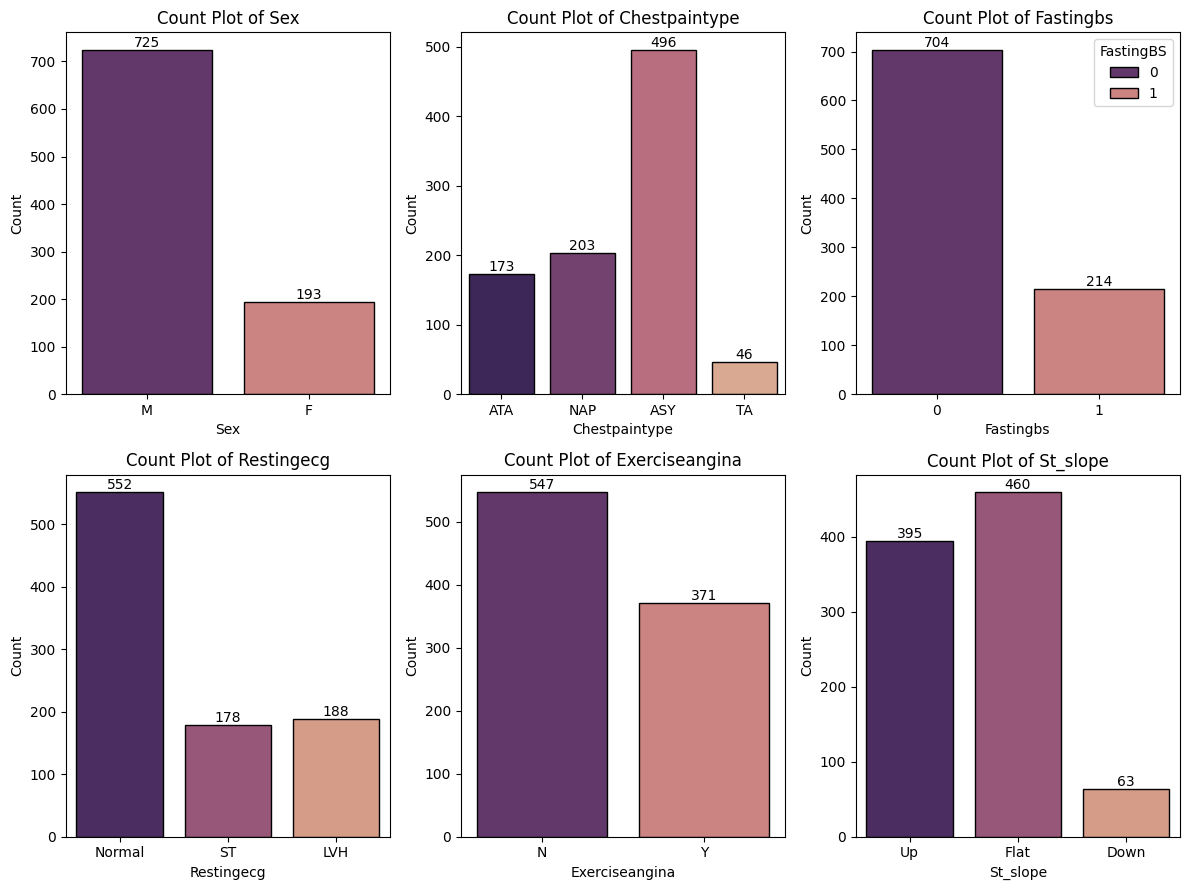

In [33]:
categorical_features = ['Sex','ChestPainType','FastingBS','RestingECG','ExerciseAngina','ST_Slope']

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 9))
axes = axes.ravel()

for i, column in enumerate(categorical_features):
    sns.countplot(x=df[column], data=df, palette='magma', ax=axes[i],
                  saturation=0.50,edgecolor='k', hue=df[column])
    for container in axes[i].containers:
        axes[i].bar_label(container, color='black', size=10)
    axes[i].set_title(f'Count Plot of {column.capitalize()}')
    axes[i].set_xlabel(column.capitalize())
    axes[i].set_ylabel('Count')
    
    
plt.tight_layout()
plt.show()